<a href="https://colab.research.google.com/github/sidharthkumar10500/sidharthkumar10500.github.io/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, February 19 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.   

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

In this assignment, we will be exploring 4 main problems and a subjective question. 
1. Data exploration and visualization (20 points)
2. Data pre-processing (25 points)
3. Feature extraction (20 points)
4. A problem on k-NN (25 points)
5. ML lifecycle (10 points)

For each of the main problem, you would be generating images to understand the embedded pattern in data and visualise how a classifier would make decisions based on that data. 

The starter code to load the wine quality dataset is given to you. All the packages you would need for this assignment are provided below and please refrain from using any other packages. If you find it necessary to use other packages, please post a question on Piazza or contact the TA. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#!pip install soundfile #if the soudfile library is not available on the go
import soundfile as sf 
import warnings#to not print the warings
warnings.filterwarnings('ignore')

tdf_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

# 1.1. Plot the histogram of the quality score for:

1.1.a. red wine

1.1.b. white wine 

1.1.c. Identify the total number of samples in each dataset. 

1.1.d. Plot the histogram of both the 'quality' data in the same graph. 

1.1.e. Plot the histogram of both the 'quality' data in the same graph after normalization. From the plot, determine the wine that is better in quality and explain. 

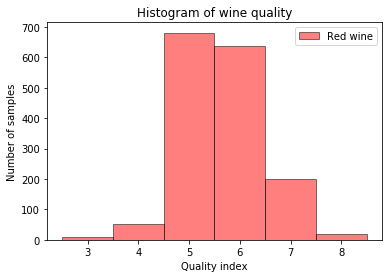

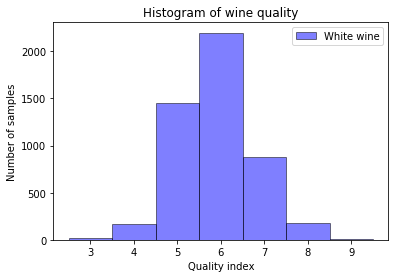

Number of data points for red wine (1599, 12)
Number of data points for white wine (4898, 12)


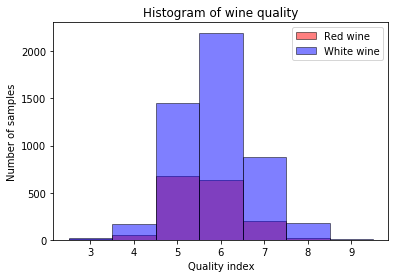

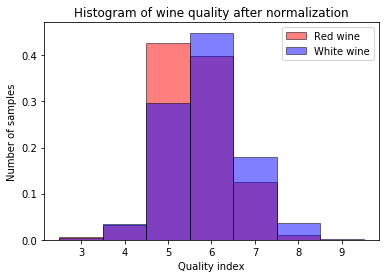

mean of red wine quality 5.6360225140712945
mean of white wine quality 5.87790935075541


In [2]:
#1.1.a. histogram of the quality score for red wine
unique_red_quality = np.asarray(tdf_red.quality.unique())#find the unique quality numbers
unique_red_quality = np.sort(unique_red_quality)#sort the unique  quality numbers
bins = np.arange(np.min(unique_red_quality)-0.5,np.max(unique_red_quality)+1.5,1)#bins for the histogram, 0.5 in start and 1.5 for end because of the structure of numpy array
p1 = plt.hist(tdf_red.loc[:,"quality"], bins=bins, edgecolor='black', facecolor='red', alpha=.5,label='Red wine')
plt.xlabel('Quality index')
plt.ylabel('Number of samples')
plt.title('Histogram of wine quality')
plt.legend()#to show legend
plt.show()

#1.1.b. histogram of the quality score for white wine
unique_white_quality = np.asarray(df_white.quality.unique())#find the unique quality numbers
unique_white_quality = np.sort(unique_white_quality)#sort the unique  quality numbers
bins = np.arange(np.min(unique_white_quality)-0.5,np.max(unique_white_quality)+1.5,1)#bins for the histogram, 0.5 in start and 1.5 for end because of the structure of numpy array
p1 = plt.hist(df_white.loc[:,"quality"], bins=bins, edgecolor='black', facecolor='blue', alpha=.5,label='White wine')
plt.xlabel('Quality index')
plt.ylabel('Number of samples')
plt.title('Histogram of wine quality')
plt.legend()#to show legend
plt.show()

#1.1.c. total number of datasets in each dataset
#tdf_red.head# to get an overview idea about the data
#print(tdf_red.loc[:,:].describe()) #describes the mean/median/std of each column of dataset
#print(tdf_red.dtypes)#to find the data types of each column
print("Number of data points for red wine",tdf_red.shape)#to find the shape of the dataset
print("Number of data points for white wine",df_white.shape)#to find the shape of the dataset


#1.1.d. histogram of quality score of both wines in same graph
bins = np.arange(np.min(unique_white_quality)-0.5,np.max(unique_white_quality)+1.5,1)
p1 = plt.hist(tdf_red.loc[:,"quality"], bins=bins, edgecolor='black', facecolor='red', alpha=.5,label='Red wine')
p2 = plt.hist(df_white.loc[:,"quality"], bins=bins, edgecolor='black',facecolor='blue', alpha=.5,label='White wine')
plt.xlabel('Quality index')
plt.ylabel('Number of samples')
plt.title('Histogram of wine quality')
plt.legend()
plt.show()

#1.1.e. histogram of normalized quality scores for both wines in same graph
bins = np.arange(np.min(unique_white_quality)-0.5,np.max(unique_white_quality)+1.5,1)
p1 = plt.hist(tdf_red.loc[:,"quality"], bins=bins, edgecolor='black', facecolor='red', alpha=.5,label='Red wine',density=1)
p2 = plt.hist(df_white.loc[:,"quality"], bins=bins, edgecolor='black',facecolor='blue', alpha=.5,label='White wine',density=1)
plt.xlabel('Quality index')
plt.ylabel('Number of samples')
plt.title('Histogram of wine quality after normalization')
plt.legend()
plt.show()

print("mean of red wine quality",tdf_red.quality.mean())
print("mean of white wine quality",df_white.quality.mean())

From the plot of normalized wine quality, we can observe that the white wine have higher probability of people rating it higher. This is also confirmed by the average quality scores for the different wines. So, the white wine is better in quality.

# 1.2. In this part, we will determine the correlation between quality and features. This exercise will help in feature selection in the event of limited data availability. 
Do this separately for red and white wine. 

1.2.a. The resulting correlation plot should be (12x12) matrix. 

1.2.b. You will notice that the diagonal elements would always correlate with a score of 1. Explain the reason. 

1.2.c. List the top 5 features with maximum correlation for quality. 

1.2.d. List two features for each data with positive and negative correlation. 


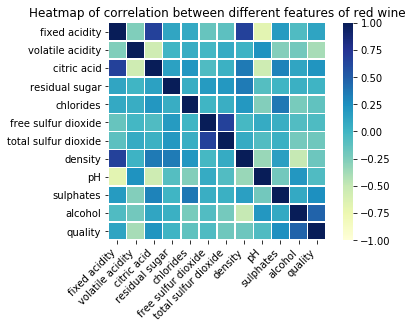

In [3]:
# doing first for the red wine
#1.2.a. correlation plot
red_corr = tdf_red.corr();#calculating the correlation among different columns of red wine features
#red_corr.dtypes

ax = sns.heatmap(red_corr,vmin=-1, vmax=1, center=0,cmap="YlGnBu",square=True, linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
ax.set_title('Heatmap of correlation between different features of red wine')
plt.show()

1.2.b. The diagonal elements always correlate with a score of 1, because the self corelation of any array with itself is always 1, because they are one and the same thing. 

In [4]:
#1.2.c. top 5 features with maximum correlation for quality
numpy_corr = np.asarray(red_corr)#creating a numpy array of correlation coefficients for the red wine
numpy_column_name = np.asarray(tdf_red.columns)#numpy array for the title of different features

quality_corr=numpy_corr[0:11,11];#just extracting out the correlation coefficients for the quality vs other features (first 11 correlation values)
sort_index = np.argsort(quality_corr);#sorts the array in the ascending order
sort_index = sort_index[::-1];#get the index in descending order
print("top 5 features with maximum correlation for quality of red wine:- ",numpy_column_name[sort_index[0:5]])#numpy array is slightly different form matlab, the last element 5 is not selected

#1.2.d. two features with positive and negative correlation
print("2 features with positive correlation for quality of red wine:- ",numpy_column_name[sort_index[0:2]])
print("2 features with negative correlation for quality of red wine:- ",numpy_column_name[sort_index[-2:]])

top 5 features with maximum correlation for quality of red wine:-  ['alcohol' 'sulphates' 'citric acid' 'fixed acidity' 'residual sugar']
2 features with positive correlation for quality of red wine:-  ['alcohol' 'sulphates']
2 features with negative correlation for quality of red wine:-  ['total sulfur dioxide' 'volatile acidity']


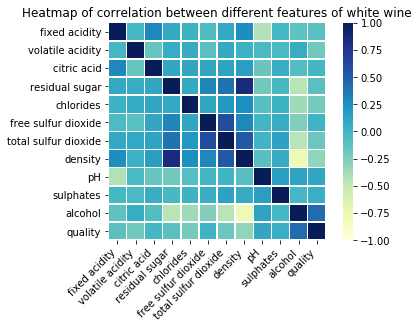

top 5 features with maximum correlation for quality of white wine:-  ['alcohol' 'pH' 'sulphates' 'free sulfur dioxide' 'citric acid']
2 features with positive correlation for quality of white wine:-  ['alcohol' 'pH']
2 features with negative correlation for quality of white wine:-  ['chlorides' 'density']


In [5]:
# doing now for the white wine
#1.2.a. correlation plot
white_corr = df_white.corr();#calculating the correlation among different columns of red wine features
#red_corr.dtypes

ax = sns.heatmap(white_corr,vmin=-1, vmax=1, center=0,cmap="YlGnBu",square=True, linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
ax.set_title('Heatmap of correlation between different features of white wine')
plt.show()

#1.2.c. top 5 features with maximum correlation for quality
numpy_corr = np.asarray(white_corr)#creating a numpy array of correlation coefficients for the red wine
numpy_column_name = np.asarray(df_white.columns)#numpy array for the title of different features

quality_corr=numpy_corr[0:11,11];#just extracting out the correlation coefficients for the quality vs other features (first 11 correlation values)
sort_index = np.argsort(quality_corr);#sorts the array in the ascending order
sort_index = sort_index[::-1];#get the index in descending order
print("top 5 features with maximum correlation for quality of white wine:- ",numpy_column_name[sort_index[0:5]])#numpy array is slightly different form matlab, the last element 5 is not selected

#1.2.d. two features with positive and negative correlation
print("2 features with positive correlation for quality of white wine:- ",numpy_column_name[sort_index[0:2]])
print("2 features with negative correlation for quality of white wine:- ",numpy_column_name[sort_index[-2:]])

# 1.3. Plot the scatter plot for 'features vs. quality' for red and white wine.
1.3.a. Plot 11 figures with 'each feature vs. quality' for red and white wine. 

1.3.b. For the top two features with positive correlation from the 1.2, do you observe a similar trend in the scatter plot? 

1.3.c. For the top two negatively correlated features from 1.2, do you observe a similar trend in the scatter plot?
If not, why is there a disparity based on the figures? 

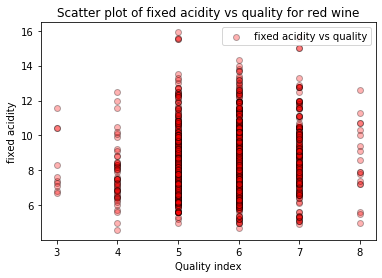

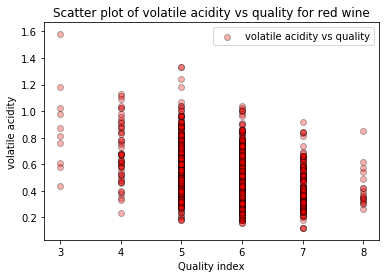

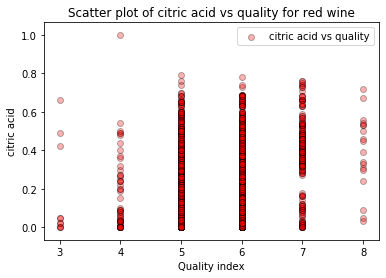

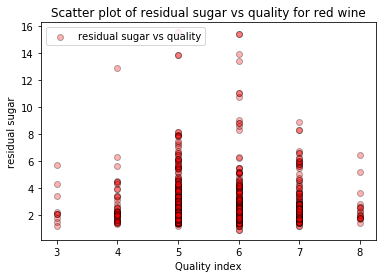

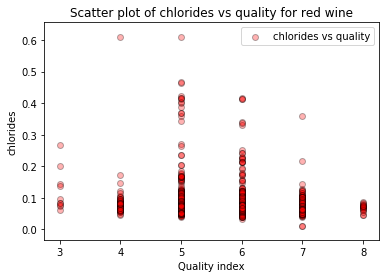

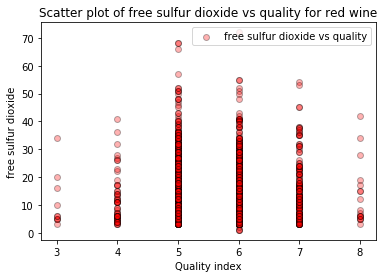

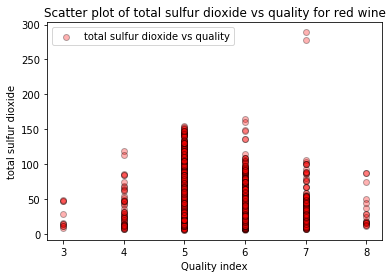

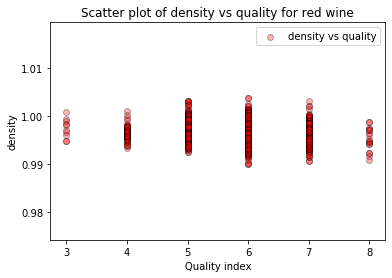

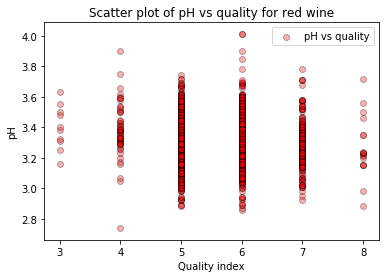

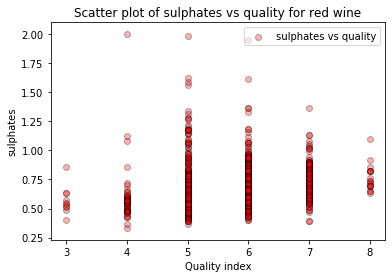

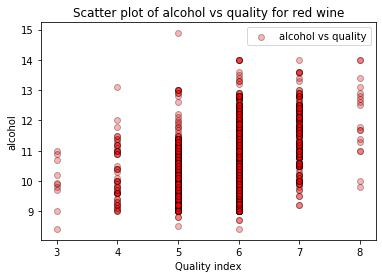

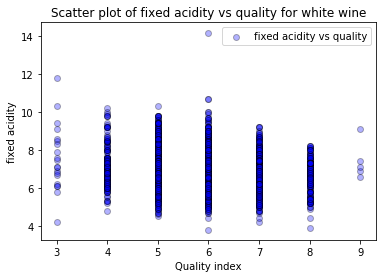

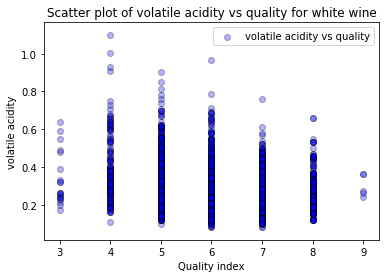

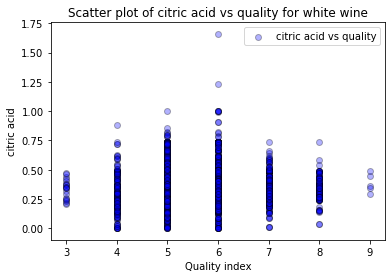

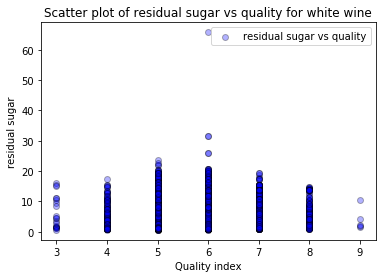

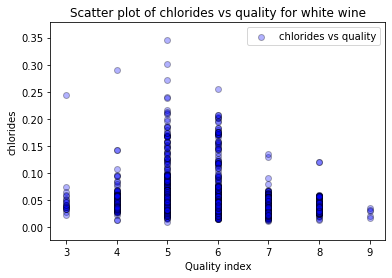

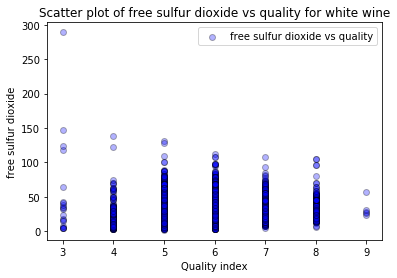

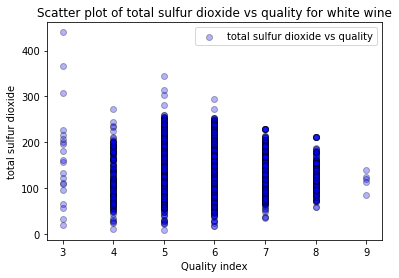

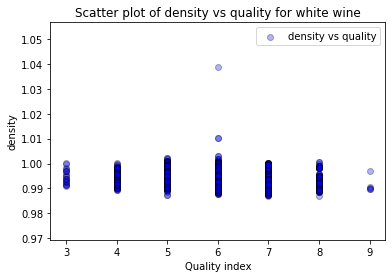

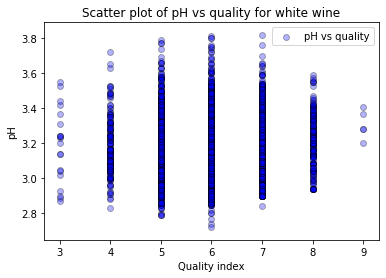

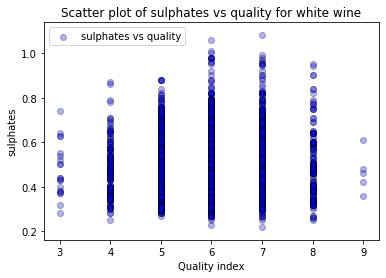

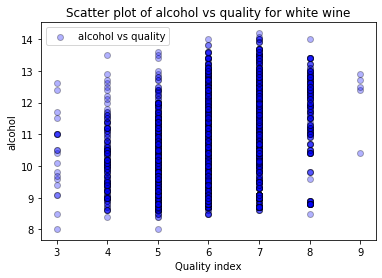

In [6]:
#1.3. scatter plot of "each feature vs quality" for red and white wine
column_names = tdf_red.columns#name of different feature columns
a_shape = tdf_red.shape;#shape of the red wine data
for x in range(0,a_shape[1]-1):
    label = column_names[x] + " vs quality"
    plt.scatter(tdf_red.loc[:,"quality"], tdf_red.iloc[:,x],c ='red',label=label,alpha=0.3, edgecolors='black')
    plt.legend()
    plt.xlabel('Quality index')
    plt.ylabel(column_names[x])
    plt.title('Scatter plot of '+column_names[x] +' vs quality for red wine')
    plt.show()


column_names = df_white.columns#name of different feature columns
a_shape = df_white.shape;#shape of the red wine data
for x in range(0,a_shape[1]-1):
    label = column_names[x] + " vs quality"
    plt.scatter(df_white.loc[:,"quality"], df_white.iloc[:,x],c ='blue',label=label,alpha=0.3, edgecolors='black')
    plt.legend()
    plt.xlabel('Quality index')
    plt.ylabel(column_names[x])
    plt.title('Scatter plot of '+column_names[x] +' vs quality for white wine')
    plt.show()

**1.3.b. For the top two features with positive correlation from the 1.2, do you observe a similar trend in the scatter plot?**

I can observe from the plot that the average value of quality increases as the positive correlation feature is increased. For red wine, the top correlated feature is "alcohol" and as the level of alcohol increases the quality of the wine is increasing. The second highest correlated feature (sulfates) also shows this, but the visualization is not so subtle.For white wine, the top two features with positive correlation are alcohol and ph. With alcohol, the observation is clear as the alcohol level increases the quality index is also increasing. However, for the ph the observation is not clear from the scatter plot.

**1.3.c. For the top two negatively correlated features from 1.2, do you observe similar trend in the scatter plot?If not, why is there a disparity based on the figures?**

For red wine, the top two negatively correlated features are total sulphur dioxide and volatile acidity. It is clear from the plots that as the quality is increasing the value of both the features is decreasing, which is following the intuition for negatively correlated features. For white wine, the top two negatively correlated features were chlorides and density. For chlorides, there is an observation that as the quality is increasing the chloride level is decreasing. However, for density, the observation is not clear. The disparity is mainly because all the points are so closely clustered, it is difficult to make any conclusion. The reason behind the points being so closely clustered is that there are so many outlier points that are unnecessarily scaling the y-axis. 

# 1.4. Plot the box plot to identify the total number of outlier for top two positive and negatively correlated features 
1.4.a. For red wine data (4 box plots)

1.4.b. For white wine data (4 box plots)

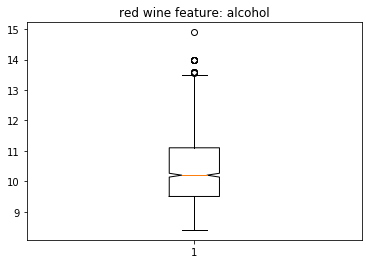

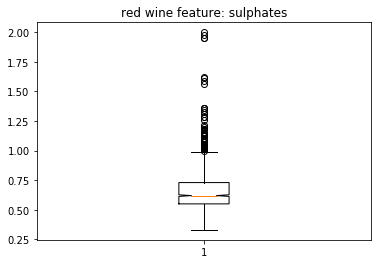

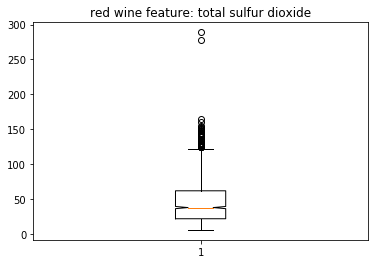

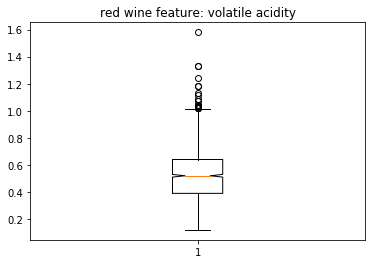

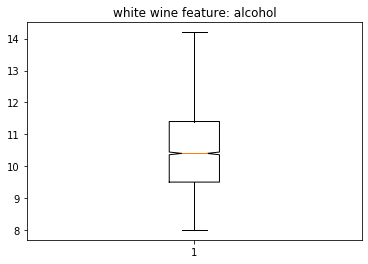

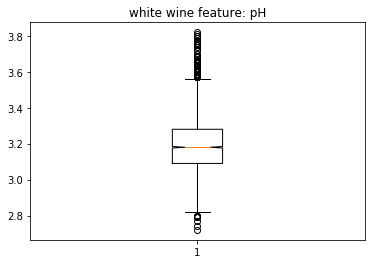

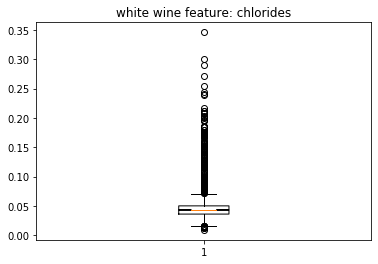

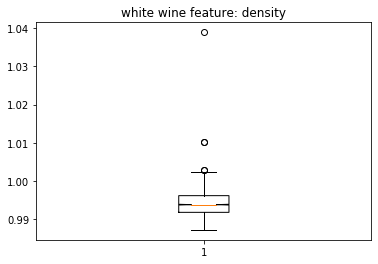

In [7]:
#1.4.a for the red wine
plt.boxplot(tdf_red.loc[:,"alcohol"],notch=True)
plt.title('red wine feature: alcohol')
plt.show()
plt.boxplot(tdf_red.loc[:,"sulphates"],notch=True)
plt.title('red wine feature: sulphates')
plt.show()
plt.boxplot(tdf_red.loc[:,"total sulfur dioxide"],notch=True)
plt.title('red wine feature: total sulfur dioxide')
plt.show()
plt.boxplot(tdf_red.loc[:,"volatile acidity"],notch=True)
plt.title('red wine feature: volatile acidity')
plt.show()

#1.4.b for the white wine
plt.boxplot(df_white.loc[:,"alcohol"],notch=True)
plt.title('white wine feature: alcohol')
plt.show()
plt.boxplot(df_white.loc[:,"pH"],notch=True)
plt.title('white wine feature: pH')
plt.show()
plt.boxplot(df_white.loc[:,"chlorides"],notch=True)
plt.title('white wine feature: chlorides')
plt.show()
plt.boxplot(df_white.loc[:,"density"],notch=True)
plt.title('white wine feature: density')
plt.show()

# 2. In this question we will explore data pre-processing: missing values, normalization
2.1.a. Write the code to replace outliers of each feature with NaN. (2 sigma 
deviation can be used) 

2.1.b. write the code to replace the missing values with mean, median, forward and backward values. Save these as separate dataframes since we would use them again in the last question. 

2.1.c. What is data normalization and how did normalization help in identifying the white wine vs. red wine quality from 1.1.e?

In [0]:
# tdf_red.shape[1]
# col_name = tdf_red_modified.columns[0]
# #print(tdf_red_modified[col_name][0:100])
# #print(col_name)
# # red_summary = tdf_red.describe()#storing the statistical information about red wine data 
# print(tdf_red_modified.iloc[1:45,5])
# # print(tdf_red.head())#to see the starting values of the data
# # print(tdf_red.tail())#to see the end values of the data

In [0]:
#2.1.a replacing outliers of each feature with NaN
#replaing outliers for the red wine data
red_summary = tdf_red.describe()#storing the statistical information about red wine data 
tdf_red_modified = tdf_red.copy(deep=True)#creating a new dataframe to store the modified data

for i in range(0,tdf_red.shape[1]-1):
    # Grab the mean and std of attribute i
    mean = red_summary.iloc[1, i]#mean is on the second row
    std = red_summary.iloc[2, i]#std is on the third row
    col_name = tdf_red_modified.columns[i]
    tdf_red_modified.loc[abs(tdf_red_modified[col_name] - mean) >= 2*std, col_name] = np.NaN

#replaing outliers for the white wine data
white_summary = df_white.describe()#storing the statistical information about red wine data 
tdf_white_modified = df_white.copy(deep=True)#creating a new dataframe to store the modified data

for i in range(0,df_white.shape[1]-1):
    # Grab the mean and std of attribute i
    mean = white_summary.iloc[1, i]#mean is on the second row
    std = white_summary.iloc[2, i]#std is on the third row
    col_name = tdf_white_modified.columns[i]
    tdf_white_modified.loc[abs(tdf_white_modified[col_name] - mean) >= 2*std, col_name] = np.NaN

#2.1.b replace the missing values with mean, median, forward and backward values
tdf_red_mean = tdf_red_modified.fillna(tdf_red_modified.mean())#fill the NaN values with mean, this does not change the origianl dataframe
tdf_red_median = tdf_red_modified.fillna(tdf_red_modified.median())#fill the NaN values with median
tdf_red_forward = tdf_red_modified.fillna(method='ffill')#propagate last valid observation forward 
tdf_red_backward = tdf_red_modified.fillna(method='bfill')#use next valid observation to fill holes

tdf_white_mean = tdf_white_modified.fillna(tdf_white_modified.mean())
tdf_white_median = tdf_white_modified.fillna(tdf_white_modified.median())
tdf_white_forward = tdf_white_modified.fillna(method='ffill')#propagate last valid observation forward 
tdf_white_backward = tdf_white_modified.fillna(method='bfill')#use next valid observation to fill holes

**2.1.c.** Data normalization is the process of bringing the data from multiple sources into a common standpoint so that the required features can be compared without any existing bias. Before normalization, it was difficult to comment upon the quality of white and red wine. White wine had more datapoints so it was showing a higher bar on the histogram. After normalization, we were able to compare the approximate probability of people rating the wine at a particular point.

# 3. Feature extraction: 
In this question, we will take a quick detour to extract spectrogram features from two audio files. 
The started code to load the audio data is provided in this exercise. 

3.1.a. Plot the time vs. amplitude plot of the audio signal. 

3.1.b. Plot the spectrogram for both the audio files. 

3.1.c. Explain the algorithm used to extract the spectrogram. What does the information on the spectogram signify? 


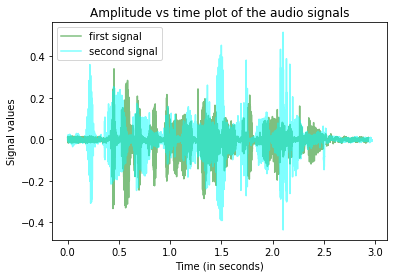

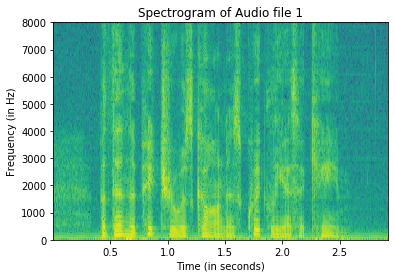

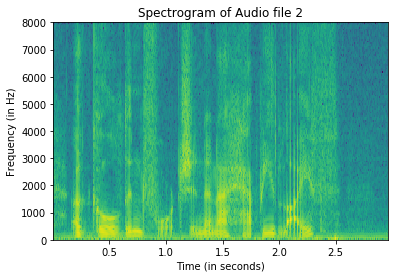

sample rate of second signal =  16000


In [10]:
data1, samplerate1 = sf.read("61-70968-0006.flac") 
data2, samplerate2 = sf.read("61-70968-0002.flac")
#print(np.shape(data1))
#3.1.a amplitude vs time plot of audio signals
plt.plot(np.arange(0,np.shape(data1)[0]/samplerate1,1/samplerate1),data1,label='first signal',alpha=0.5,color='green')
plt.plot(np.arange(0,np.shape(data2)[0]/samplerate2,1/samplerate2),data2,label='second signal',alpha=0.5,color='cyan')
plt.xlabel('Time (in seconds)')
plt.ylabel('Signal values')
plt.title('Amplitude vs time plot of the audio signals')
plt.legend()
plt.show()

#3.1.b spectrogram for both the audio files
NFFT = 256  # The number of data points used in each block for the FFT. A power 2 is most efficient.
plt.specgram(data1,NFFT = NFFT, Fs=samplerate1,scale='dB');
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency (in Hz)')
plt.title('Spectrogram of Audio file 1')
plt.show()
plt.specgram(data2,NFFT = NFFT, Fs=samplerate2);
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency (in Hz)')
plt.title('Spectrogram of Audio file 2')
plt.show()
print('sample rate of second signal = ',samplerate2)

**3.1.c.** The spectrogram is a heat map plot of frequency components of the signal vs time. The data in time domain is divided into bins of a fixed length, which are Fourier transformed to get the frequency spectrum. These time block can also overlap so as to create a continuous time sense of frequency plot. The frequency components calculated by FFT form one line of the spectrogram. 
The information on the spectrogram specifies that for a particular value of time, relative strength of different frequency components.

# 4. Going back to the wine dataset, we will convert the quality index to categories corresponding to ['low, 'medium', 'high'] and create a k-NN classifier to classify the wine dataset into one of these categories based on features. 
4.1.a. Write the code to convert rating between 0 to 3.5 as low, 3.5 to 7 as medium and 7 to 10 as high. 

4.1.b. Identify the total number of samples for each class and randomly select the same number of samples from the other classes (That is, if there are 65 samples of 'high' quality, randomly pick 65 samples from 'medium' and 65 samples from 'low' and use that to split into train and test)

4.1.c. create a k-NN classifier and report the accuracy using the data from 2.1.b. Report the accuracy in each case.  

4.1.d. create a k-NN classifier, preprocess the input feature using standard scalar to normalize and report the accuracy using the data from 2.1.b. Do you see a difference in accuracy? If yes, explain the reason. 

4.1.e. For a k-NN classifier with the above data, report the accuracy. Plot the prediciton along with the decision boundaries. (Hint: You cannot use all the features and you would have to pick 2 features. Explain the reason behind the choice of those features) 

In [11]:
red_wine_quality = np.array(tdf_red.loc[:,"quality"])#quality column of red wine
red_quality_cat = np.asarray(red_wine_quality,dtype="str")#category wise division of red wine quality
for i in np.arange(0,np.size(red_wine_quality)):
    if  red_wine_quality[i] < 5.5:
        red_quality_cat[i] = 'low' 
    elif 5.5 <= red_wine_quality[i] < 6.5:
         red_quality_cat[i] = 'medium'
    elif 6.5<= red_wine_quality[i] <10:
         red_quality_cat[i] = 'high'         
red_wine_features = np.array(tdf_red.iloc[:,0:11])#bringing the data into np array for processing the KNN classifier
red_wine_features1 = np.array(tdf_red_mean.iloc[:,0:11])#bringing the data into np array for processing the KNN classifier
red_wine_features2 = np.array(tdf_red_median.iloc[:,0:11])#bringing the data into np array for processing the KNN classifier
red_wine_features3 = np.array(tdf_red_forward.iloc[:,0:11])#bringing the data into np array for processing the KNN classifier
red_wine_features4 = np.array(tdf_red_backward.iloc[:,0:11])#bringing the data into np array for processing the KNN classifier


np_red_wine = np.concatenate((red_wine_features, red_quality_cat[:, None]), axis=1)#single 2D array with 1599X12
np_red_wine1 = np.concatenate((red_wine_features1, red_quality_cat[:, None]), axis=1)#single 2D array with 1599X12
np_red_wine2 = np.concatenate((red_wine_features2, red_quality_cat[:, None]), axis=1)#single 2D array with 1599X12
np_red_wine3 = np.concatenate((red_wine_features3, red_quality_cat[:, None]), axis=1)#single 2D array with 1599X12
np_red_wine4 = np.concatenate((red_wine_features4, red_quality_cat[:, None]), axis=1)#single 2D array with 1599X12
print("shape of red wine features:", red_wine_features.shape)
print("shape of red quality categories:", red_quality_cat.shape)

labels = np.sort(red_quality_cat)
labels = list(labels)
unique_lables = np.unique(labels)#unique labels in the data: 'low', 'medium', 'high'
for x in unique_lables: print(x, labels.count(x))

#need to randomly select the same number of data points from different label classes of low, medium and high (217)
#np_red_wine_sorted = np_red_wine[np_red_wine[:,11].argsort()] #sorted the array w.r.t to the last column of quality

shape of red wine features: (1599, 11)
shape of red quality categories: (1599,)
high 217
low 744
medium 638


In [0]:
#function to sort the array according to quality and to generate the random indexes
def generate_random_samples(data_in):
    data_in_sorted = data_in[data_in[:,11].argsort()]#sorted the array w.r.t to the last column of quality
    index1 = 217 + np.random.choice(744, 217, replace=False) #generating random indexes for the second category
    index2 = 961 + np.random.choice(638, 217, replace=False) #generating random indexes for the third category
    output = np.concatenate((data_in_sorted[0:217,:],data_in_sorted[index1,:],data_in_sorted[index2,:]),axis=0)
    return output

np_red_wine_for_classifier = generate_random_samples(np_red_wine)
np_red_wine_for_classifier1 = generate_random_samples(np_red_wine1)#mean
np_red_wine_for_classifier2 = generate_random_samples(np_red_wine2)#median
np_red_wine_for_classifier3 = generate_random_samples(np_red_wine3)#forward
np_red_wine_for_classifier4 = generate_random_samples(np_red_wine4)#backward


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def KNNclassifier(data_in,test_size,k):
    X_train, X_test, y_train, y_test = train_test_split(data_in[:,0:10], data_in[:,11], test_size=test_size, random_state=42)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)#train the KNN model
    y_pred = neigh.predict(X_test)#predict the KNN model
    #print("Accuracy score for k = ", k, ":" , accuracy_score(y_pred, y_test))
    return accuracy_score(y_pred, y_test)

k = 3;#variable for defining the neighbours in the kNN classifier
test_size = 0.3;#variable to define the test train split in the data
print("original red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier,test_size,k) )
print("Mean red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier1,test_size,k) )
print("Median  red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier2,test_size,k) )
print("Forward red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier3,test_size,k) )
print("Backward red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier4,test_size,k) )

original red wine data: Accuracy score for k =  3 : 0.4744897959183674
Mean red wine data: Accuracy score for k =  3 : 0.4489795918367347
Median  red wine data: Accuracy score for k =  3 : 0.336734693877551
Forward red wine data: Accuracy score for k =  3 : 0.3826530612244898
Backward red wine data: Accuracy score for k =  3 : 0.40816326530612246


In [14]:
#code for normalizing the feature vector
def normalizer(data_in):
    quality_col = data_in[:,11] 
    normal_val = StandardScaler().fit_transform(data_in[:,0:11])#sklearn internal function fit_transform to normalize the data
    normalized_data = np.concatenate((normal_val,quality_col[:,None]),axis=1)
    return normalized_data


np_red_wine_for_classifier_normalized = normalizer(np_red_wine_for_classifier)
np_red_wine_for_classifier_normalized1 = normalizer(np_red_wine_for_classifier1)
np_red_wine_for_classifier_normalized2 = normalizer(np_red_wine_for_classifier2)
np_red_wine_for_classifier_normalized3 = normalizer(np_red_wine_for_classifier3)
np_red_wine_for_classifier_normalized4 = normalizer(np_red_wine_for_classifier4)
print("Original Normalized red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier_normalized,test_size,k) )
print("Mean Normalized red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier_normalized1,test_size,k) )
print("Median Normalized red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier_normalized2,test_size,k) )
print("Forward Normalized red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier_normalized3,test_size,k) )
print("Backward Normalized red wine data: Accuracy score for k = ", k, ":" , KNNclassifier(np_red_wine_for_classifier_normalized4,test_size,k) )

Original Normalized red wine data: Accuracy score for k =  3 : 0.576530612244898
Mean Normalized red wine data: Accuracy score for k =  3 : 0.4897959183673469
Median Normalized red wine data: Accuracy score for k =  3 : 0.45918367346938777
Forward Normalized red wine data: Accuracy score for k =  3 : 0.5510204081632653
Backward Normalized red wine data: Accuracy score for k =  3 : 0.5663265306122449


In [180]:
# Plotting decision regions
x_min, x_max = red_wine_features[:, 10].min() - 1, red_wine_features[:, 10].max() + 1
y_min, y_max = red_wine_features[:, 9].min() - 1, red_wine_features[:, 9].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
clf = neighbors.KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train[:195], y_train[:195])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#p1 = plt.hist(tdf_red.loc[:,"quality"], bins=bins, edgecolor='black', facecolor='red', alpha=.5,label='Red wine')
# plt.xlabel('Quality index')
# plt.ylabel('Number of samples')
# plt.title('Histogram of wine quality')
# plt.legend()#to show legend
#plt.show()

ValueError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(np_red_wine_for_classifier[:,0:10], np_red_wine_for_classifier[:,11], test_size=0.1, random_state=42)

In [175]:
train_list = list(y_train)
for x in unique_lables: print(x, train_list.count(x))

test_list = list(y_test)
for x in unique_lables: print(x, test_list.count(x))

high 192
low 196
medium 197
high 25
low 21
medium 20


In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train[:195], y_train[:195])
y_pred = neigh.predict(X_test)

print("Accuracy score for k=3:", accuracy_score(y_pred, y_test))

Accuracy score for k=3: 0.48484848484848486


# 5. ML lifecycle
During different stages of an ML lifecycle, there is always a fine balance between revisiting feature extraction and model parameter determination based on model verification. From the exercise above, briefly explain why feature extraction and feature selection is important for model performance.
How is model complexity increased for a k-NN and how would that affect the model verification step?